Data shape: (20631, 26)
RUL added
Sensor data scaled
Sequences shape: (17631, 30, 21)
Targets shape: (17631,)


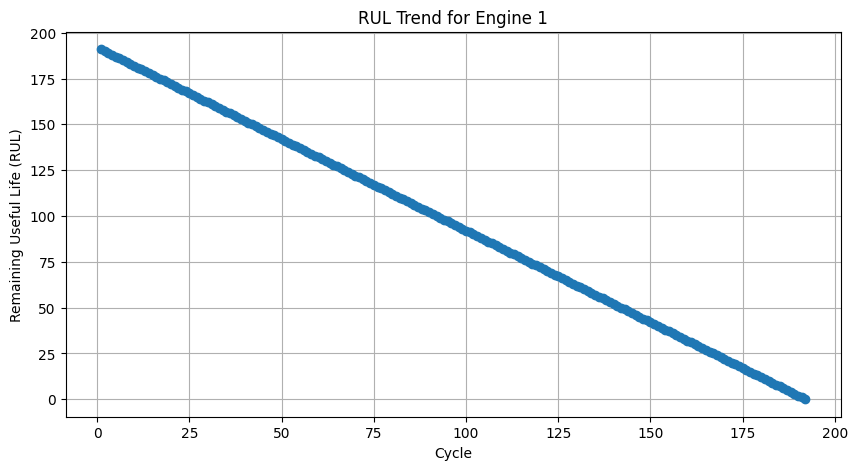

In [1]:
# Step 0: Add src folder to path
import sys
sys.path.append("D:/Progonos Ai/Milestone1/src")

# Step 1: Import functions
from data_loader import load_cmapss_dataset
from preprocess import scale_sensors
from feature_engineering import add_rul_column, create_sequences

import matplotlib.pyplot as plt

# Step 2: Load dataset
df = load_cmapss_dataset("D:/Progonos Ai/Milestone1/data/raw/train_FD001.txt")
print("Data shape:", df.shape)
df.head()

# Step 3: Compute RUL
df = add_rul_column(df)
print("RUL added")
df[['unit_number','time_in_cycles','RUL']].head()

# Step 4: Scale sensor data
sensor_cols = [col for col in df.columns if "sensor" in col]
df, scaler = scale_sensors(df, sensor_cols)
print("Sensor data scaled")
df[sensor_cols].head()

# Step 5: Create sequences
X, y = create_sequences(df, sequence_length=30, feature_cols=sensor_cols)
print("Sequences shape:", X.shape)
print("Targets shape:", y.shape)

# Step 6: Plot RUL trend for example engine
example_engine = 1
engine_df = df[df['unit_number'] == example_engine]

plt.figure(figsize=(10,5))
plt.plot(engine_df['time_in_cycles'], engine_df['RUL'], marker='o')
plt.title(f"RUL Trend for Engine {example_engine}")
plt.xlabel("Cycle")
plt.ylabel("Remaining Useful Life (RUL)")
plt.grid(True)
plt.show()